In [5]:
import numpy as np
import matplotlib.pyplot as plt


def angular_distance(a, b):
    """Calculate the minimum angular distance on a circle."""
    return min(abs(a - b), 180 - abs(a - b))

def farthest_point_sampling(angles, n):
    """
    Selects n angles from the provided list to maximize coverage.
    
    Parameters:
        angles (list or array): Input list of angles (0° to 360°).
        n (int): Number of angles to select.
    
    Returns:
        selected (list): Selected angles maximizing coverage.
    """
    angles = np.array(sorted(angles))
    selected = []

    # Start by selecting the first angle arbitrarily (e.g., first angle)
    selected.append(angles[0])
    unselected = list(angles[1:])

    while len(selected) < n:
        max_min_dist = -1
        next_angle = None
        
        for candidate in unselected:
            # Find distance to nearest selected point
            min_dist = min(angular_distance(candidate, sel) for sel in selected)
            
            # Choose the candidate with largest minimum distance
            if min_dist > max_min_dist:
                max_min_dist = min_dist
                next_angle = candidate
        
        selected.append(next_angle)
        unselected.remove(next_angle)
    
    return sorted(selected)


In [6]:
angles = [5.0, 15, 30, 45, 90, 120, 150, 180]

n = 5

selected_angles = farthest_point_sampling(angles, n)

print("Selected angles:", selected_angles)



Selected angles: [5.0, 45.0, 90.0, 120.0, 150.0]


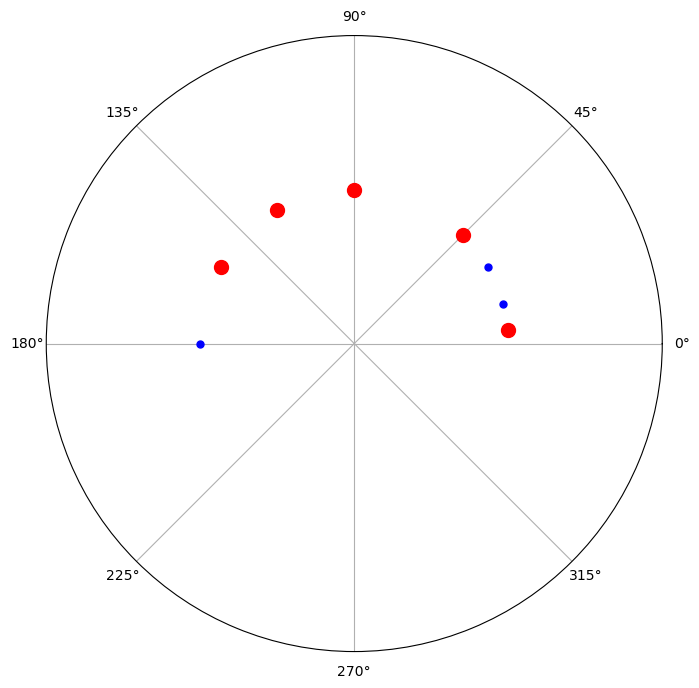

In [7]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
angles_rad = np.radians(angles)
ax.plot(angles_rad, np.ones(len(angles))*2, marker='o', linestyle='None', color='blue', markersize=5, label='All Angles')
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5])
ax.plot(np.radians(selected_angles), np.ones(len(selected_angles))*2, marker='o', linestyle='None', color='red', markersize=10, label='Selected Angles')

In [ ]:
theta